In [26]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import fitsio 
from astropy.table import Table, join, Column
from astropy.stats import LombScargle

from scipy.signal import savgol_filter

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [4]:
ls ../reduced/

Ascella_fluxmap_o1_sub1.png    halo_commands_c11.txt*
Ascella_weightmap_o1_sub1.png  halo_commands_c12.txt*
Ascellahalo_lc_o1.fits         halo_commands_c13.txt*
Ascellahalo_lc_o1.png          halo_commands_c14.txt*
c10/                           halo_commands_c15.txt*
c11/                           halo_commands_c16.txt*
c12/                           halo_commands_c17.txt*
c13/                           halo_commands_c18.txt*
c14/                           halo_commands_c6.txt*
c15/                           halo_commands_c7.txt*
c16/                           halo_commands_c8.txt*
c17/                           halo_commands_c9.txt*
c18/                           nu2_Sgr_fluxmap_o1_sub1.png
c7/                            nu2_Sgr_weightmap_o1_sub1.png
c8/                            nu2_Sgrhalo_lc_o1.fits
c9/                            nu2_Sgrhalo_lc_o1.png
halo_commands_c10.txt*


In [27]:
fname = '../reduced/Ascellahalo_lc_o1.fits'
data = Table.read(fname)
m = np.isfinite(data['corr_flux'])*(data['quality']==0)
data = data[m]
print(data.keys())

['time', 'cadence', 'x', 'y', 'quality', 'corr_flux']


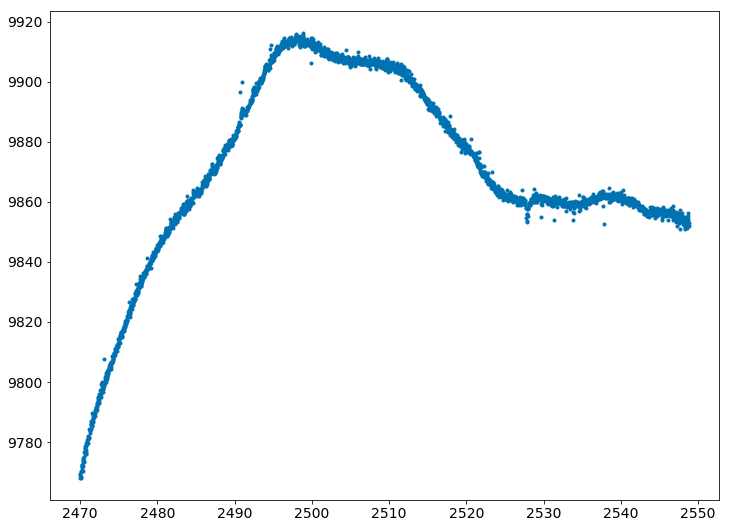

In [16]:
plt.plot(data['time'],data['corr_flux'],'.')

In [34]:
scf = savgol_filter(data['corr_flux'],201,1)
smooth = data['corr_flux']-scf+np.nanmedian(scf)
smooth /= np.nanmedian(smooth)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


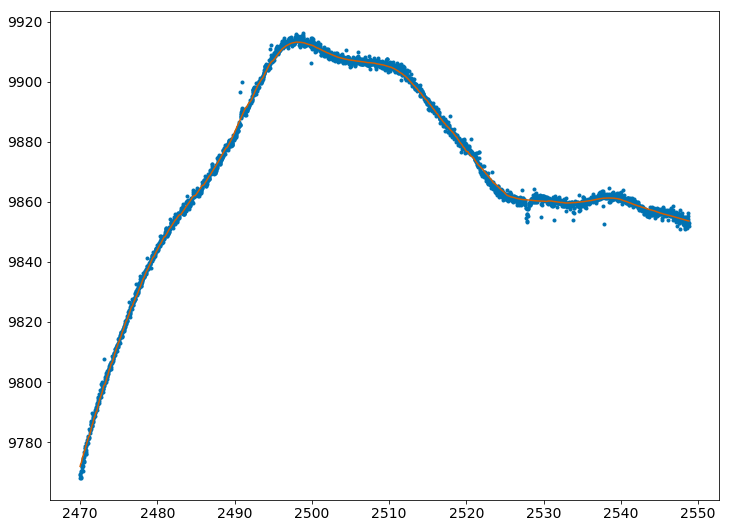

In [35]:
plt.plot(data['time'],data['corr_flux'],'.')
plt.plot(data['time'],scf,'-',color=colours[2])

Text(0.5, 1.01, 'Ascella Light Curve')

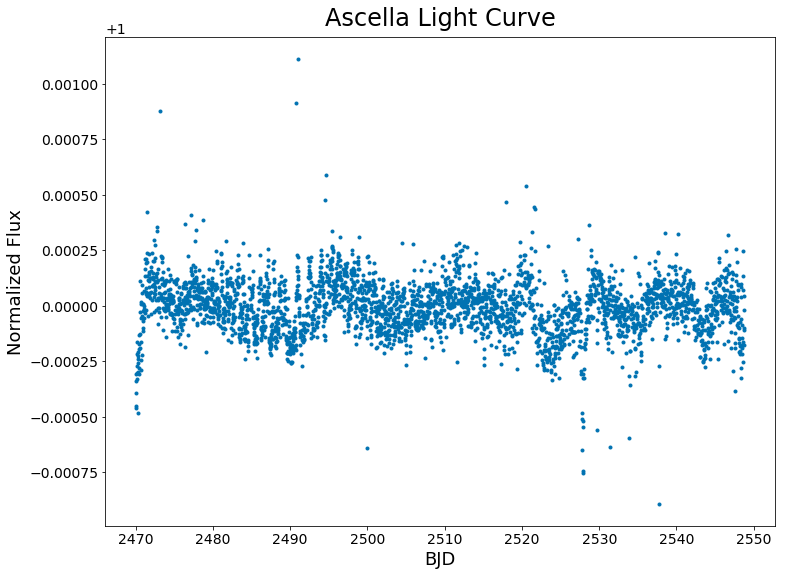

In [43]:
plt.plot(data['time'],smooth,'.')
plt.xlabel('BJD')
plt.ylabel('Normalized Flux')
plt.title('Ascella Light Curve',y=1.01)

In [38]:
ls = LombScargle(data['time'],smooth,smooth/1.e4)

In [46]:
min_p, max_p = 0.1, 20.
frequency, power = ls.autopower(minimum_frequency=1./max_p,maximum_frequency=1./min_p,samples_per_peak=5)
spower = savgol_filter(power,51,1)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


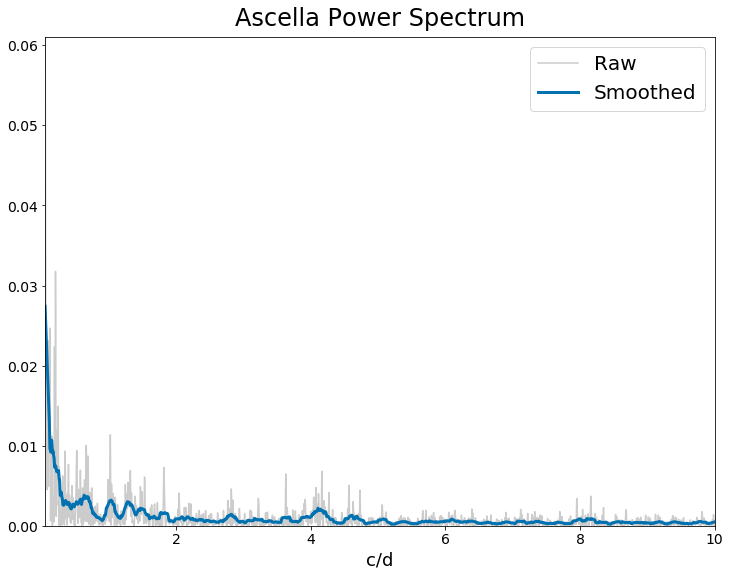

In [55]:
plt.plot(frequency,power,'0.8',label='Raw')
plt.plot(frequency,spower,linewidth=3.0,label='Smoothed')

plt.xlim(1./max_p,1./min_p)
plt.xlabel('c/d')
plt.ylim(0,np.max(power));
plt.title('Ascella Power Spectrum',y=1.01)
plt.legend();